<h1>cars.csv</h1>
The dataset contains information about 3 brands namely US,Japan, Europe. Other parameters are mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year. The task is to find the brand of a car using these parameters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score


In [2]:
#read the csv file
cars=pd.read_csv('cars.csv')

In [3]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
cars.shape

(261, 8)

In [5]:
#step1 :encode the target variable
lb=LabelEncoder()
lb.fit(cars['brand'])
cars['brand']=lb.transform(cars['brand'])

KeyError: 'brand'

In [ ]:
cars['brand']

0      2
1      0
2      2
3      2
4      2
      ..
256    2
257    1
258    2
259    2
260    2
Name: brand, Length: 261, dtype: int64

In [ ]:
#step 2 to divide target and feature variables
x=cars.drop('brand',axis=1)
y=cars['brand']

In [ ]:
#step3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#step4 decision tree classifier
dt=DecisionTreeClassifier(max_features=3,max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=3)

In [ ]:
#step 5 
graph_data=open('graph.dot','w')
export_graphviz(dt,out_file=graph_data,filled=True,special_characters=True,
                feature_names=list(x_train.columns),class_names=list(lb.classes_),rounded=True)
graph_data.close()

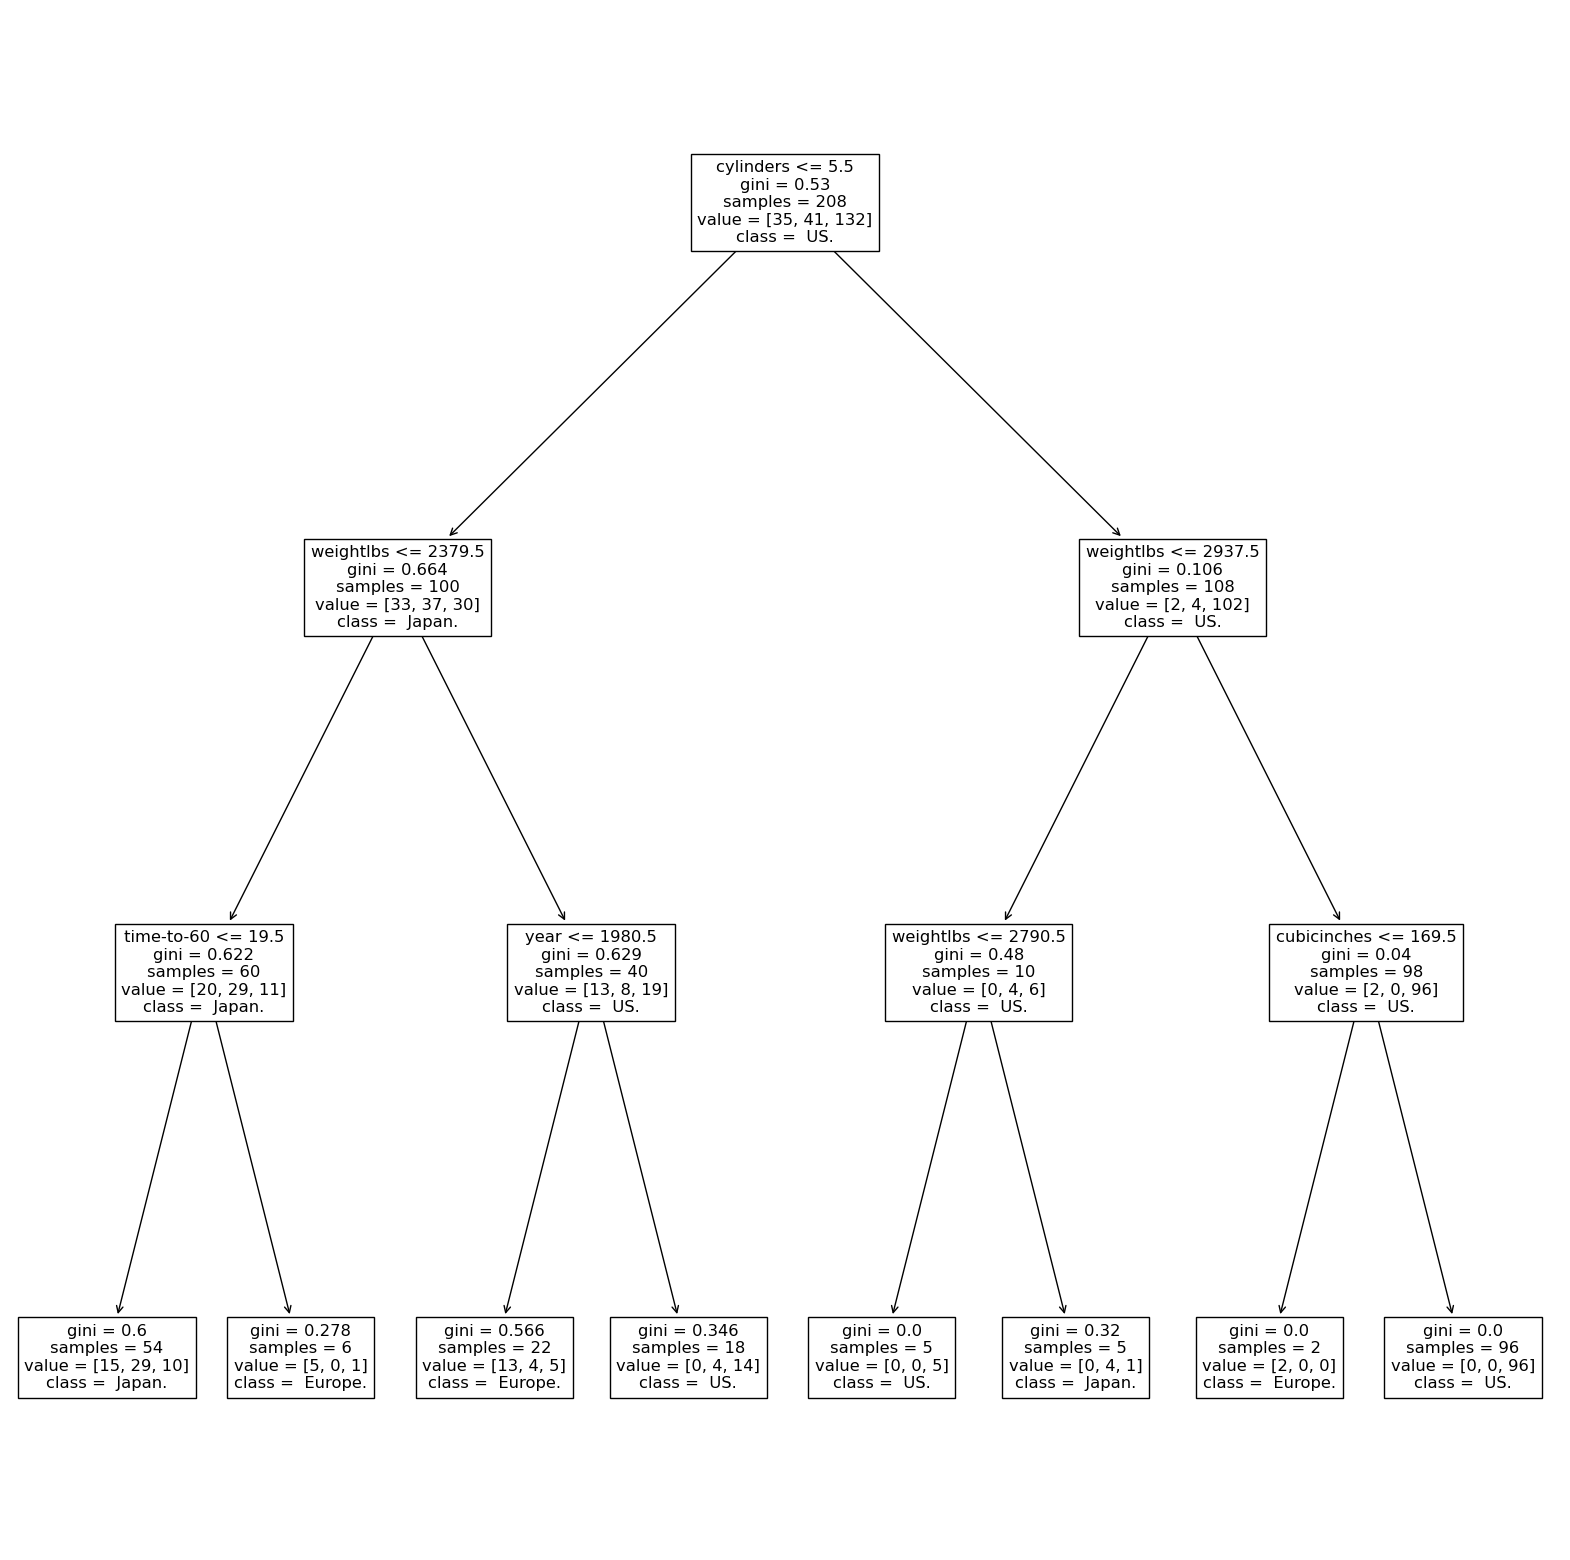

In [ ]:
#plot the tree
plt.figure(figsize=(20,20))
plot_tree(dt,class_names=list(lb.classes_),feature_names=list(x_train.columns))
plt.show()

In [ ]:
pred=dt.predict(x_test)
accuracy_score(y_test,pred)

0.7358490566037735